This example quantifies the effect of back-reaction.

# Import Modules

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

#Current Working Directory
import os
cwd = os.getcwd()

from pathlib import Path

In [61]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]

import numpy as np

import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.pppc as pppc

from darkhistory.spec.spectrum import Spectrum
from darkhistory.spec.spectra import Spectra


from tqdm import tqdm_notebook as tqdm

import main


## Load Transfer Functions

In [62]:

# CMB_subtracted=True
# direc = '/Users/gregoryridgway/Dropbox (MIT)/Photon Deposition'
# highengphot_tf_interp = pickle.load(open(direc+"/tfs_20190120/processed/highengphot_tf_interp.raw", "rb"))
# lowengphot_tf_interp  = pickle.load(open(direc+"/tfs_20190120/processed/lowengphot_tf_interp.raw", "rb"))
# lowengelec_tf_interp  = pickle.load(open(direc+"/tfs_20190120/processed/lowengelec_tf_interp.raw", "rb"))
# highengdep_interp     = pickle.load(open(direc+"/tfs_20190120/processed/highengdep_interp.raw", "rb"))
# CMB_engloss_interp    = pickle.load(open(direc+"/tfs_20190120/processed/CMB_engloss_interp.raw", "rb"))
    
# Useful Definitions
# photeng = highengphot_tf_interp.eng
# eleceng = lowengelec_tf_interp.eng

### ics transfer functions

In [63]:
# %autoreload
# direc = cwd+'/../../tfs/ics/'
# ics_file = Path(direc+'ics_thomson_ref_tf.p')

# if ics_file.is_file():
#     ics_thomson_ref_tf = pickle.load(open(direc+'ics_thomson_ref_tf.p', "rb"))
#     ics_rel_ref_tf = pickle.load(open(direc+'ics_rel_ref_tf.p', "rb"))
#     engloss_ref_tf = pickle.load(open(direc+'engloss_ref_tf.p', "rb"))
# else:
#     ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf = main.load_ics_data()
#     pickle.dump(ics_thomson_ref_tf, open(direc+'ics_thomson_ref_tf.p', "wb"))
#     pickle.dump(ics_rel_ref_tf, open(direc+'ics_rel_ref_tf.p', "wb"))
#     pickle.dump(engloss_ref_tf, open(direc+'engloss_ref_tf.p', "wb"))

In [64]:
struct_data = np.loadtxt(open(cwd+"/../structure_formation_data/boost_Einasto_subs.txt", "rb"))

log_struct_interp = interp1d(np.log(struct_data[:,0]), np.log(struct_data[:,1]))

def struct_boost_einasto(rs):
    if rs < 76:
        return np.exp(log_struct_interp(np.log(rs)))
    else:
        return 1
struct_boost = struct_boost_einasto

## $\chi \chi \to \bar{b} b$

In [65]:
mDM=49e9
sigmav = 1.75e-26
inj_type='swave'

photeng = main.highengphot_tf_interp.eng
eleceng = main.lowengelec_tf_interp.eng

In [66]:
# import csv
# with open('/Users/hongwan/Dropbox (MIT)/Photon Deposition/elec_spec.csv', 'r') as f:
#     reader = csv.reader(f)
#     elecDat = list(reader)
# elecDat = np.array([[float(str.split(dat[0],'\t')[0]), float(str.split(dat[0],'\t')[1])] 
#            for dat in elecDat])

# with open('/Users/hongwan/Dropbox (MIT)/Photon Deposition/phot_spec.csv', 'r') as f:
#     reader = csv.reader(f)
#     photDat = list(reader)
# photDat = np.array([[float(str.split(dat[0],'\t')[0]), float(str.split(dat[0],'\t')[1])] 
#            for dat in photDat])

# elecInterp = interp1d(elecDat[:,0], elecDat[:,1])
# photInterp = interp1d(photDat[:,0], photDat[:,1])

# elec_spec_init = spectools.discretize(eleceng,elecInterp)
# phot_spec_init = spectools.discretize(photeng,photInterp)

# elec_spec_init *= .19*mDM/elec_spec_init.toteng()
# phot_spec_init *= .28*mDM/phot_spec_init.toteng()

# elec_spec_init.rs = 3000
# elec_spec_init.switch_spec_type()

# phot_spec_init.rs = 3000
# phot_spec_init.switch_spec_type()

# print('Fraction of energy in photons: ', phot_spec_init.toteng()/(2*mDM )) 
# print('Fraction of energy in e+e-: ', elec_spec_init.toteng()/(2*mDM))
# print('Fraction of energy in EM states: ', phot_spec_init.toteng()/(2*mDM) + elec_spec_init.toteng()/(2*mDM))

# plt.figure()

# plt.loglog()

# phot_plot, = plt.plot(phot_spec_init.eng, phot_spec_init.dNdE, label='photons')
# elec_plot, = plt.plot(elec_spec_init.eng, elec_spec_init.dNdE, label=r'$e^+e^-$')

# plt.xlabel('Energy [eV]')
# plt.ylabel(r'dN/dE [eV$^{-1}$]')
# plt.title('Secondary Spectra')
# plt.legend(handles=[phot_plot, elec_plot],loc=2)

# plt.axis([1e-1, 4e12, 1e-15, 1e-4])

In [67]:
elec_spec_init = pppc.get_pppc_spec(mDM, eleceng, 'b', 'phot')
phot_spec_init = pppc.get_pppc_spec(mDM, photeng, 'b', 'elec')

elec_spec_init.rs = 3000
elec_spec_init.switch_spec_type()

phot_spec_init.rs = 3000
phot_spec_init.switch_spec_type()

print('Fraction of energy in photons: ', phot_spec_init.toteng()/(2*mDM )) 
print('Fraction of energy in e+e-: ', elec_spec_init.toteng()/(2*mDM))
print('Fraction of energy in EM states: ', phot_spec_init.toteng()/(2*mDM) + elec_spec_init.toteng()/(2*mDM))

Fraction of energy in photons:  0.17867965699717725
Fraction of energy in e+e-:  0.2713189811814895
Fraction of energy in EM states:  0.44999863817866675


[0.1, 4000000000000.0, 1e-15, 0.0001]

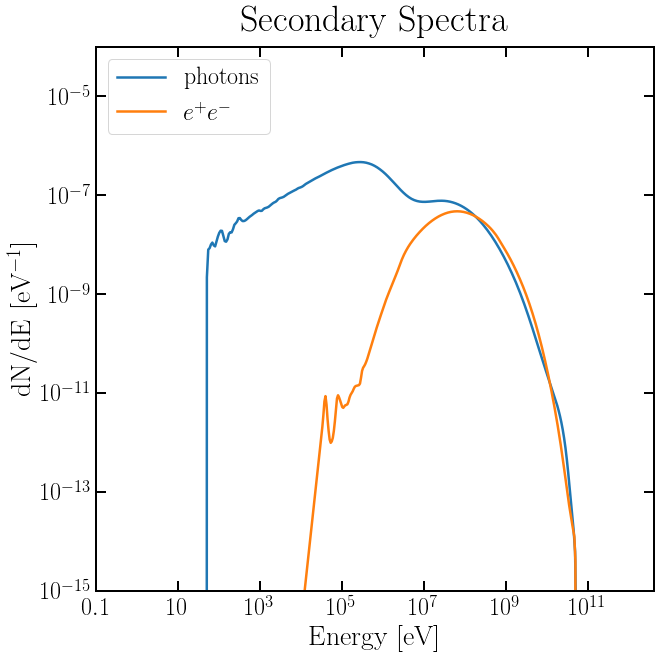

In [59]:
plt.figure()

plt.loglog()

phot_plot, = plt.plot(phot_spec_init.eng, phot_spec_init.dNdE, label='photons')
elec_plot, = plt.plot(elec_spec_init.eng, elec_spec_init.dNdE, label=r'$e^+e^-$')

plt.xlabel('Energy [eV]')
plt.ylabel(r'dN/dE [eV$^{-1}$]')
plt.title('Secondary Spectra')
plt.legend(handles=[phot_plot, elec_plot],loc=2)

plt.axis([1e-1, 4e12, 1e-15, 1e-4])

In [36]:
%autoreload

coarsen_factor=16
Ecom=mDM
end_rs=4.995

def rate_func_N(rs):
    return phys.inj_rate(inj_type, rs, mDM=mDM, sigmav = sigmav)*struct_boost(rs)/Ecom
def rate_func_eng(rs):
    return phys.inj_rate(inj_type, rs, mDM=mDM, sigmav = sigmav)*struct_boost(rs)


withDM_noBR = main.evolve(
    elec_spec_init, phot_spec_init,
    rate_func_N, rate_func_eng, end_rs,
#     highengphot_tf_interp, lowengphot_tf_interp, lowengelec_tf_interp,
#     highengdep_interp, CMB_engloss_interp,
#     ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf,
    coarsen_factor=coarsen_factor, std_soln=True,
    reion_switch=False,
    struct_boost=struct_boost,
    ics_only=False, separate_higheng=True, CMB_subtracted=True,
    user=None, verbose=False, 
    use_tqdm=True
)

../darkhistory/spec/spectra.py:401: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  np.issubdtype(type(other), float)
../darkhistory/spec/spectra.py:402: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  or np.issubdtype(type(other), int)


In [38]:
noDM = main.evolve(
    elec_spec_init*0, phot_spec_init*0,
    rate_func_N, rate_func_eng, end_rs,
#     highengphot_tf_interp, lowengphot_tf_interp, lowengelec_tf_interp,
#     highengdep_interp, CMB_engloss_interp,
#     ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf,
    coarsen_factor=coarsen_factor, std_soln=True,
    reion_switch=False,
    struct_boost=struct_boost,
    ics_only=False, separate_higheng=True, CMB_subtracted=True,
    user=None, verbose=False, 
    use_tqdm=True
)

In [39]:
withDM_BR = main.evolve(
    elec_spec_init, phot_spec_init,
    rate_func_N, rate_func_eng, end_rs,
#     highengphot_tf_interp, lowengphot_tf_interp, lowengelec_tf_interp,
#     highengdep_interp, CMB_engloss_interp,
#     ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf,
    coarsen_factor=coarsen_factor, std_soln=False,
    reion_switch=False,
    struct_boost=None,
    ics_only=False, separate_higheng=True, CMB_subtracted=True,
    use_tqdm=True
)

In [40]:
withDM_noBR = a

NameError: name 'a' is not defined

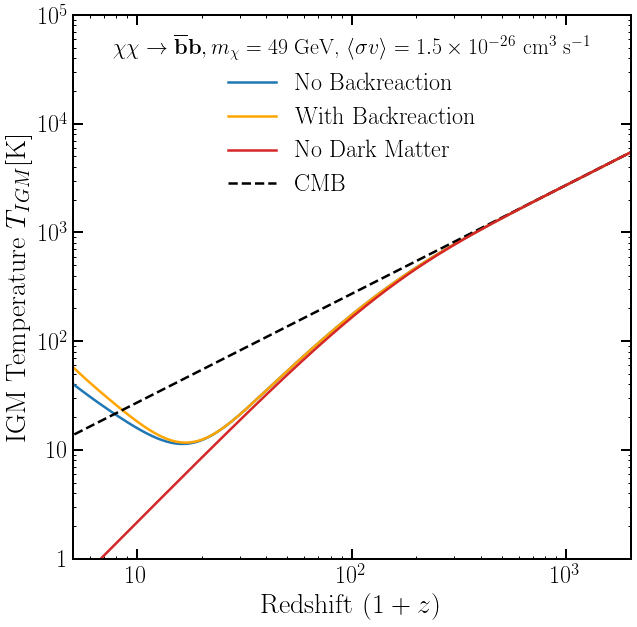

In [41]:
plt.figure()
ax = plt.gca()
ax.loglog()

plt.xlabel('Redshift $(1+z)$')
plt.ylabel('IGM Temperature $T_{IGM}$[K]')

rs_list = withDM_noBR[3].rs[:-1]

plt.axis([5, 2e3, 1, 1e5])
# plt.axvline(5.8, color='gray', linestyle='--', alpha=0.3)

plot_noBR, = plt.plot(rs_list, withDM_noBR[1][:]/phys.kB, label='No Backreaction', color='C0')
plot_BR, = plt.plot(rs_list, withDM_BR[1][:]/phys.kB, label='With Backreaction', color='orange')
plot_CMB, = plt.plot(rs_list, phys.TCMB(rs_list)/phys.kB, label='CMB', color='k', linestyle='--')
plot_std, = plt.plot(rs_list, noDM[1][:]/phys.kB, label='No Dark Matter', color='C3')

legend = plt.legend(handles=[plot_noBR, plot_BR, plot_std, plot_CMB], loc=9,
           frameon=False, title='$\mathbf{\chi\chi \\rightarrow \overline{b}b}, m_\chi = 49$ GeV,'+
                    ' $\langle \sigma v \\rangle = 1.5 \\times 10^{-26}$ cm$^3$ s$^{-1}$')
legend.get_title().set_fontsize('22')

# plt.savefig('/Users/'+user+'/Dropbox (MIT)/Photon Deposition/Draft/plots/bb_bar_swave_T.png')

-The above is an example of what inputs need to be put in the code (back-reaction, structure formation, input spectra)

-Fix the normalization

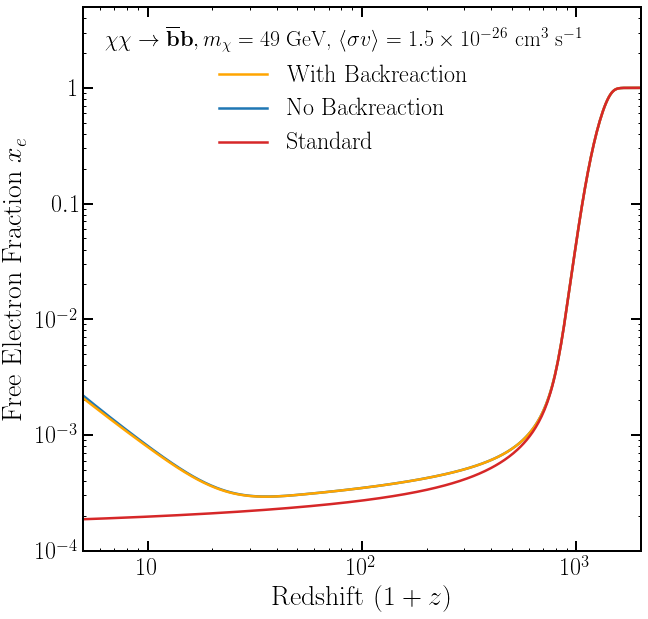

In [42]:
plt.figure()
ax = plt.gca()
ax.loglog()

plt.xlabel('Redshift $(1+z)$')
plt.ylabel('Free Electron Fraction $x_e$')

plt.axis([5, 2e3, 1e-4, 5])
# plt.axvline(7, color='gray', linestyle='--', alpha=0.3)

plot_noBR, = plt.plot(rs_list, withDM_noBR[0][:,0], label='No Backreaction', color='C0')
plot_BR, = plt.plot(rs_list, withDM_BR[0][:,0], label='With Backreaction', color='orange')
plot_std, = plt.plot(rs_list, noDM[0][:,0], label='Standard', color='C3')

legend = plt.legend(handles=[plot_BR, plot_noBR, plot_std], loc=0, 
           frameon=False, title='$\mathbf{\chi\chi \\rightarrow \overline{b}b}, m_\chi = 49$ GeV,'+
                    ' $\langle \sigma v \\rangle = 1.5 \\times 10^{-26}$ cm$^3$ s$^{-1}$')
legend.get_title().set_fontsize('22')

# plt.savefig('/Users/'+user+'/Dropbox (MIT)/Photon Deposition/Draft/plots/bb_bar_swave_xe.png')